In [6]:
cd ..

C:\Users\csas1756\Documents\GitHub\picarro-calculator


In [7]:
import Picarro as pica
import PicarroDatabase as pdb
import pickle

In [8]:
files = pdb.checkforrawdata(r'J:\c715\Picarro\Results\Results 2019\Raw data')

There is no new raw data in directory: J:\c715\Picarro\Results\Results 2019\Raw data


In [4]:
#files = pdb.listFiles('example_data')

In [29]:
files

['J:\\c715\\Picarro\\Results\\Results 2017\\Raw data\\HBDS2174_IsoWater_20171128_130522.csv',
 'J:\\c715\\Picarro\\Results\\Results 2017\\Raw data\\HKDS2009_IsoWater_20170116_150123.csv',
 'J:\\c715\\Picarro\\Results\\Results 2017\\Raw data\\HKDS2009_IsoWater_20170117_134054.csv',
 'J:\\c715\\Picarro\\Results\\Results 2017\\Raw data\\HKDS2009_IsoWater_20170118_140940.csv',
 'J:\\c715\\Picarro\\Results\\Results 2017\\Raw data\\HKDS2009_IsoWater_20170119_141602.csv',
 'J:\\c715\\Picarro\\Results\\Results 2017\\Raw data\\HKDS2009_IsoWater_20170120_130526.csv',
 'J:\\c715\\Picarro\\Results\\Results 2017\\Raw data\\HKDS2009_IsoWater_20170127_140237.csv',
 'J:\\c715\\Picarro\\Results\\Results 2017\\Raw data\\HKDS2009_IsoWater_20170128_111618.csv',
 'J:\\c715\\Picarro\\Results\\Results 2017\\Raw data\\HKDS2009_IsoWater_20170129_111201.csv',
 'J:\\c715\\Picarro\\Results\\Results 2017\\Raw data\\HKDS2009_IsoWater_20170130_134345.csv',
 'J:\\c715\\Picarro\\Results\\Results 2017\\Raw data\\HKDS20

In [9]:
conn = pdb.CreateConnection(r'J:\c715\Picarro\Results\Database\rawdata.db')

for file in files:
    pdb.AddSummaryRun(file,conn)
    pdb.AddRaw(file,conn)

TypeError: 'NoneType' object is not iterable

In [ ]:
#pdb.AddRun("example_data/HKDS2009_IsoWater_20191005_095530.csv",conn)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [81]:
df = pd.read_sql_query("select * from rawrun where RUN_ID > 20170000;",conn)

In [82]:
df=df.where(df['H2O_Mean'] != '              ').dropna()
df['Line']=pd.to_numeric(df['Line'])
df=df.where(df['Line'] != 1).dropna()
df['H2O_Mean']=pd.to_numeric(df['H2O_Mean'])

In [55]:
#df=pd.read_sql_query("select * from rawrun",conn)

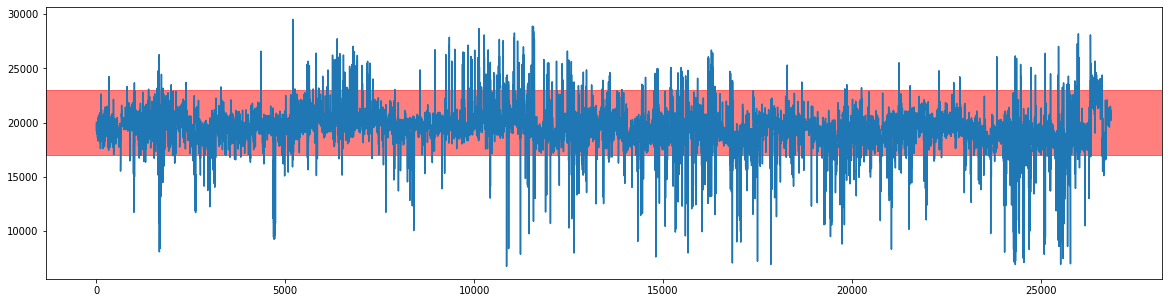

In [89]:
fig, ax=plt.subplots(figsize=(20,5))
ax.plot(df['H2O_Mean'])
ax.axhspan(17000,23000,color='red',alpha=0.5)
plt.show()

In [58]:
df

,Line,Analysis,Time Code,Port,Inj Nr,d(18_16)Mean,d(D_H)Mean,H2O_Mean,Ignore,Good,...,h16od_adjust,h16od_shift,n2_flag,DAS Temp,Tray,Sample,Job,Method,Error Code,RUN_ID
0,1,P-9095,2019/01/08 12:41:45,1-01,1,-18.029,-103.198,26807,-1,0,...,0,0,0,36.438,1,1,1,Picarro pre rinse,0,20190108
1,2,P-9095,2019/01/08 12:50:53,1-01,2,-17.396,-96.055,20014,-1,1,...,0,0,0,36.5,1,1,1,Picarro pre rinse,0,20190108
2,3,P-9095,2019/01/08 13:00:01,1-01,3,-17.532,-94.726,19778,-1,1,...,0,0,0,36.562,1,1,1,Picarro pre rinse,0,20190108
3,4,P-9095,2019/01/08 13:09:08,1-01,4,-17.414,-94.051,19629,0,1,...,0,0,0,36.688,1,1,1,Picarro pre rinse,0,20190108
4,5,P-9095,2019/01/08 13:18:15,1-01,5,-17.937,-95.832,19196,0,1,...,0,0,0,36.875,1,1,1,Picarro pre rinse,0,20190108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26860,128,P-5751,2017/12/08 09:52:48,1-18,2,-16.875,-92.604,20745,-1,1,...,0,0,0,38,1,18,2,Picarro pre rinse,0,20171207
26861,129,P-5751,2017/12/08 10:02:00,1-18,3,-16.837,-91.71,20486,-1,1,...,0,0,0,38,1,18,2,Picarro pre rinse,0,20171207
26862,130,P-5751,2017/12/08 10:11:10,1-18,4,-16.913,-92.426,20398,0,1,...,0,0,0,38,1,18,2,Picarro pre rinse,0,20171207
26863,131,P-5751,2017/12/08 10:20:20,1-18,5,-16.862,-92.054,20898,0,1,...,0,0,0,38,1,18,2,Picarro pre rinse,0,20171207
